La empresa necesita comprender los factores que llevan a la pérdida de clientes

- Enfrenta altas tasas de cancelaciones



# Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

data = pd.read_json(url)
data

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
dfs = []
df_json = data.drop(['customerID', 'Churn'], axis = 1)

#Iterar sobre las columnas anidadas
for col_df in df_json.columns:
    df = pd.json_normalize(data[col_df], sep = "_")
    dfs.append(df)

dfs.insert(0, data['Churn'])
dfs.insert(0, data['customerID'])
df_final = pd.concat(dfs, axis = 1)
df_final


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# Transformación

**Significado de las columnas:**

- customerID: número de identificación único de cada cliente

- Churn: si el cliente dejó o no la empresa

- gender: género (masculino y femenino)

- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

- Partner: si el cliente tiene o no una pareja

- Dependents: si el cliente tiene o no dependientes

- tenure: meses de contrato del cliente

- PhoneService: suscripción al servicio telefónico

- MultipleLines: suscripción a más de una línea telefónica

- InternetService: suscripción a un proveedor de internet
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
df_final.describe()

,SeniorCitizen,tenure,Charges_Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [8]:
pd.set_option('display.max_columns', None)
df_final.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
603,0862-PRCBS,No,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),103.75,7039.45
6175,8456-QDAVC,No,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1
3175,4432-ADRLB,Yes,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.65,74.9
1902,2690-DVRVK,No,Male,0,Yes,Yes,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.55,99.45
4216,5795-BKOYE,No,Female,0,Yes,Yes,69,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),59.10,4134.7
3323,4628-CTTLA,Yes,Male,0,No,No,57,No,No phone service,DSL,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,39.30,2111.45
2668,3714-XPXBW,No,Female,0,No,No,37,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),78.90,2976.95
404,0578-SKVMF,Yes,Female,0,Yes,Yes,22,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,83.30,1845.9
1055,1475-VWVDO,No,Male,0,No,No,7,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,74.90,490.55
4938,6736-DRVEW,,Female,1,No,No,33,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,110.45,3655.45


In [9]:
df_final.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

## **Descripción de las columnas**

1. customerID: 4 números y 5 letras. ej: 4332-MUOEZ
2. Churn: booleano (Yes, No) - No:0, Yes:1

Hay registros " " donde no sabemos si dejó o no la empresa.

3. gender: male - female; se podría poner 0 y 1.

females: 0, male: 1

4. SeniorCitizen: booleano (0 , 1)
5. 'Partner': booleano (Yes, No)
6. 'Dependents':: booleano (Yes, No)
7. 'tenure': número de meses (int)
8. 'PhoneService': booleano (Yes, No)
9. 'MultipleLines': booleano (Yes, No)

Si no hay servicio de telefonía, entonces es No

10. 'InternetService': Cuando no hay suscripción, se pone 'No'; sino, el tipo

Si no hay servicio de internet, entonces no hay demás aplicaciones

No:0, DLS:1, fibra óptica: 2

11. 'OnlineSecurity': booleano (Yes, No) - Pero si no hay suscripcón, se pone 'no internet service'
12. 'OnlineBackup': booleano (Yes, No) - 'no internet service'
13. 'DeviceProtection': booleano (Yes, No) - 'no internet service'
14. 'TechSupport': booleano (Yes, No) - 'no internet service'
15. 'StreamingTV': booleano (Yes, No) - 'no internet service'
16. 'StreamingMovies': booleano (Yes, No) - 'no internet service'
17. 'Contract': tipos de contrato Month-to-month ó x year

'Month-to-month': 0, 'One year': 1, 'Two year': 2

18. 'PaperlessBilling': booleano (Yes, No)
19. 'PaymentMethod': tipo String

'Mailed check':0, 'Electronic check':1, 'Credit card (automatic)':2, Bank transfer (automatic):3

20. 'Charges_Monthly': tipo Float
21. 'Charges_Total': tipo Float

In [10]:
unicos = []
for col in df_final.columns:
    unicos.append(df_final[col].unique())
    if ("Yes" in df_final[col].unique()) and ("No" in df_final[col].unique()) and not ("" in df_final[col].unique()):
        if (len(df_final[col].unique()) == 3) :
            print(col)
            for i, registro in enumerate(df_final[col]):
                if (registro != "Yes") and (registro != "No"):
                    df_final[col] = df_final[col].replace(registro, "No")
print(unicos)

MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
[array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object), array(['No', 'Yes', ''], dtype=object), array(['Female', 'Male'], dtype=object), array([0, 1]), array(['Yes', 'No'], dtype=object), array(['Yes', 'No'], dtype=object), array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0]), array(['Yes', 'No'], dtype=object), array(['No', 'Yes', 'No phone service'], dtype=object), array(['DSL', 'Fiber optic', 'No'], dtype=object), array(['No', 'Yes', 'No internet service'], dtype=object), array(['Yes', 'No', 'No internet service'], dtype=object), array(['No', 'Yes', 'No

## Estandarización de datos

In [11]:
#df_final.columns[1:]
mapa_valores = {
    "Yes": 1,
    "No": 0,

    "Male": 1,
    "Female": 0,

    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2,

    "DSL": 1,
    "Fiber optic": 2,

    "Mailed check": 0,
    "Electronic check": 1,
    "Credit card (automatic)": 2,
    "Bank transfer (automatic)": 3

}
df_final = df_final.replace(mapa_valores)
df_final.head(10)



<ipython-input-11-1010640718>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.replace(mapa_valores)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,0,0,0,1,1,9,1,0,1,0,1,0,1,1,0,1,1,0,65.60,593.3
1,0003-MKNFE,0,1,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,0,59.90,542.4
2,0004-TLHLJ,1,1,0,0,0,4,1,0,2,0,0,1,0,0,0,0,1,1,73.90,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,2,0,1,1,0,1,1,0,1,1,98.00,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,2,0,0,0,1,1,0,0,1,0,83.90,267.4
5,0013-MHZWF,0,0,0,0,1,9,1,0,1,0,0,0,1,1,1,0,1,2,69.40,571.45
6,0013-SMEOE,0,0,1,1,0,71,1,0,2,1,1,1,1,1,1,2,1,3,109.70,7904.25
7,0014-BMAQU,0,1,0,1,0,63,1,1,2,1,0,0,1,0,0,2,1,2,84.65,5377.8
8,0015-UOCOJ,0,0,1,0,0,7,1,0,1,1,0,0,0,0,0,0,1,1,48.20,340.35
9,0016-QLJIS,0,0,0,1,1,65,1,1,1,1,1,1,1,1,1,2,1,0,90.45,5957.9


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   int64  
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   int64  


In [13]:
df_final['Charges_Total'] = df_final['Charges_Total'].replace(" ", 0)
df_final['Churn'] = df_final['Churn'].replace("", 2)

<ipython-input-13-2474129365>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['Churn'] = df_final['Churn'].replace("", 2)


In [14]:
df_final['Charges_Total'] = df_final['Charges_Total'].astype(float)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   int64  
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   int64  


**Cuentas diarias**

---



In [15]:
df_final['Cuentas_Diarias'] = df_final['Charges_Monthly'] / 30
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,1,0,1,0,1,1,0,1,1,0,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,0,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,0,2,0,0,1,0,0,0,0,1,1,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,0,2,0,1,1,0,1,1,0,1,1,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,0,2,0,0,0,1,1,0,0,1,0,83.9,267.40,2.796667


In [16]:
print(type(df_final['Cuentas_Diarias'][0]))

<class 'numpy.float64'>


# Carga y análisis

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
df_final.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.318839,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,1.222513,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.688730,0.593230,1.423971,64.720098,2277.182035,2.157337
std,0.528079,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.779873,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.833174,0.491265,1.067676,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.425000,396.200000,1.180833
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.875000,3778.525000,2.995833
max,2.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.958333


In [19]:
frecuencia = df_final['Churn'].value_counts()
label_churn = ["No", "Sí", "No se sabe"]
frecuencia

,count
Churn,
0,5174
1,1869
2,224


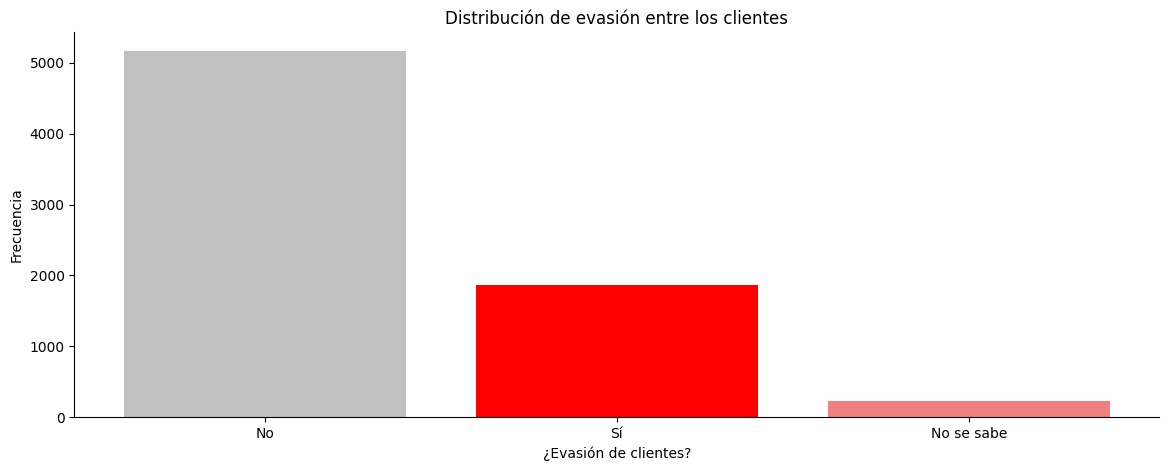

In [20]:
colors = ["silver", "red", "lightcoral"]

fig, ax = plt.subplots(figsize=(14, 5))

ax.spines["top"].set_visible(False) #Quita la raya del cuadro (arriba)
ax.spines["right"].set_visible(False) #Quita la raya del cuadro (Derecha)

ax.bar(label_churn, frecuencia, color=colors)
ax.set_title('Distribución de evasión entre los clientes')
ax.set_xlabel('¿Evasión de clientes?')
ax.set_ylabel('Frecuencia')

plt.show()

In [21]:
categorias = {
    "Género": ["Mujeres", "Hombres"],
    "¿Señores de edad?": ["No", "Sí"],
    "¿Pareja?": ["No", "Sí"],
    "¿Dependientes?": ["No", "Sí"],
    "¿Servicio de teléfono?": ["No", "Sí"],
    "¿Múltiples líneas?": ["No", "Sí"],
    "Servicio de internet": ["No", "DSL", "Fibra óptica"],
    "¿Seguridad online?": ["No", "Sí"],
    "¿Respaldo en línea?": ["No", "Sí"],
    "¿Protección del dispositivo?": ["No", "Sí"],
    "¿Soporte técnico?": ["No", "Sí"],
    "¿Streaming TV?": ["No", "Sí"],
    "¿Streaming Movies?": ["No", "Sí"],
    "Tipo de contrato": ["Mes a mes", "Un año", "Dos años"],
    "¿Factura en línea?": ["No", "Sí"],
    "Método de pago": ["Cheque", "Transferencia electrónica", "Tarjeta de crédito", "Transferencia bancaria"]

}

target = list(df_final.columns[2:-3])
target.remove("tenure")

#Se aplica el conteo de cada serie por separado, alojando cuántos hay de cada tipo
df_churn = df_final.groupby(['Churn'])[target].apply(lambda x: x.apply(pd.Series.value_counts).fillna(0))
df_churn

gender  SeniorCitizen  Partner  Dependents  PhoneService  \
Churn                                                               
0     0  2549.0         4508.0   2441.0      3390.0         512.0   
      1  2625.0          666.0   2733.0      1784.0        4662.0   
      2     0.0            0.0      0.0         0.0           0.0   
      3     0.0            0.0      0.0         0.0           0.0   
1     0   939.0         1393.0   1200.0      1543.0         170.0   
      1   930.0          476.0    669.0       326.0        1699.0   
      2     0.0            0.0      0.0         0.0           0.0   
      3     0.0            0.0      0.0         0.0           0.0   
2     0   104.0          184.0    108.0       153.0          25.0   
      1   120.0           40.0    116.0        71.0         199.0   
      2     0.0            0.0      0.0         0.0           0.0   
      3     0.0            0.0      0.0         0.0           0.0   

         MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
Churn                                                                   
0     0         3053.0           1413.0          3450.0        3268.0   
      1         2121.0           1962.0          1724.0        1906.0   
      2            0.0           1799.0             0.0           0.0   
      3            0.0              0.0             0.0           0.0   
1     0         1019.0            113.0          1574.0        1346.0   
      1          850.0            459.0           295.0         523.0   
      2            0.0           1297.0             0.0           0.0   
      3            0.0              0.0             0.0           0.0   
2     0          130.0             55.0           165.0         149.0   
      1           94.0             67.0            59.0          75.0   
      2            0.0            102.0             0.0           0.0   
      3            0.0              0.0             0.0           0.0   

         DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
Churn                                                                  
0     0            3297.0       3440.0       3281.0           3260.0   
      1            1877.0       1734.0       1893.0           1914.0   
      2               0.0          0.0          0.0              0.0   
      3               0.0          0.0          0.0              0.0   
1     0            1324.0       1559.0       1055.0           1051.0   
      1             545.0        310.0        814.0            818.0   
      2               0.0          0.0          0.0              0.0   
      3               0.0          0.0          0.0              0.0   
2     0             155.0        164.0        141.0            140.0   
      1              69.0         60.0         83.0             84.0   
      2               0.0          0.0          0.0              0.0   
      3               0.0          0.0          0.0              0.0   

         Contract  PaperlessBilling  PaymentMethod  
Churn                                               
0     0    2220.0            2403.0           1304  
      1    1307.0            2771.0           1294  
      2    1647.0               0.0           1290  
      3       0.0               0.0           1286  
1     0    1655.0             469.0            308  
      1     166.0            1400.0           1071  
      2      48.0               0.0            232  
      3       0.0               0.0            258  
2     0     130.0              84.0             53  
      1      46.0             140.0             80  
      2      48.0               0.0             46  
      3       0.0               0.0             45

In [22]:
print(df_churn.index[:4])
print(df_churn.index[:4][0]) # Cada una sería el tipo de Churn
print(df_churn.index[5:8][0])
print(df_churn.index[9:12][0])

print(df_churn.columns[:4])
print(df_churn.columns[:4][0])
print()

print(df_churn["gender"][0]) #Sale el conteo de los géneros para el "No"
print(df_churn["gender"][0][1])
#print(categorias["gender"])
print(df_churn["gender"][0][3] == 0)
print(len(df_churn["gender"][0]))
print(df_churn["gender"][1])

MultiIndex([(0, 0),
            (0, 1),
            (0, 2),
            (0, 3)],
           names=['Churn', None])
(np.int64(0), np.int64(0))
(np.int64(1), np.int64(1))
(np.int64(2), np.int64(1))
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')
gender

0    2549.0
1    2625.0
2       0.0
3       0.0
Name: gender, dtype: float64
2625.0
True
4
0    939.0
1    930.0
2      0.0
3      0.0
Name: gender, dtype: float64


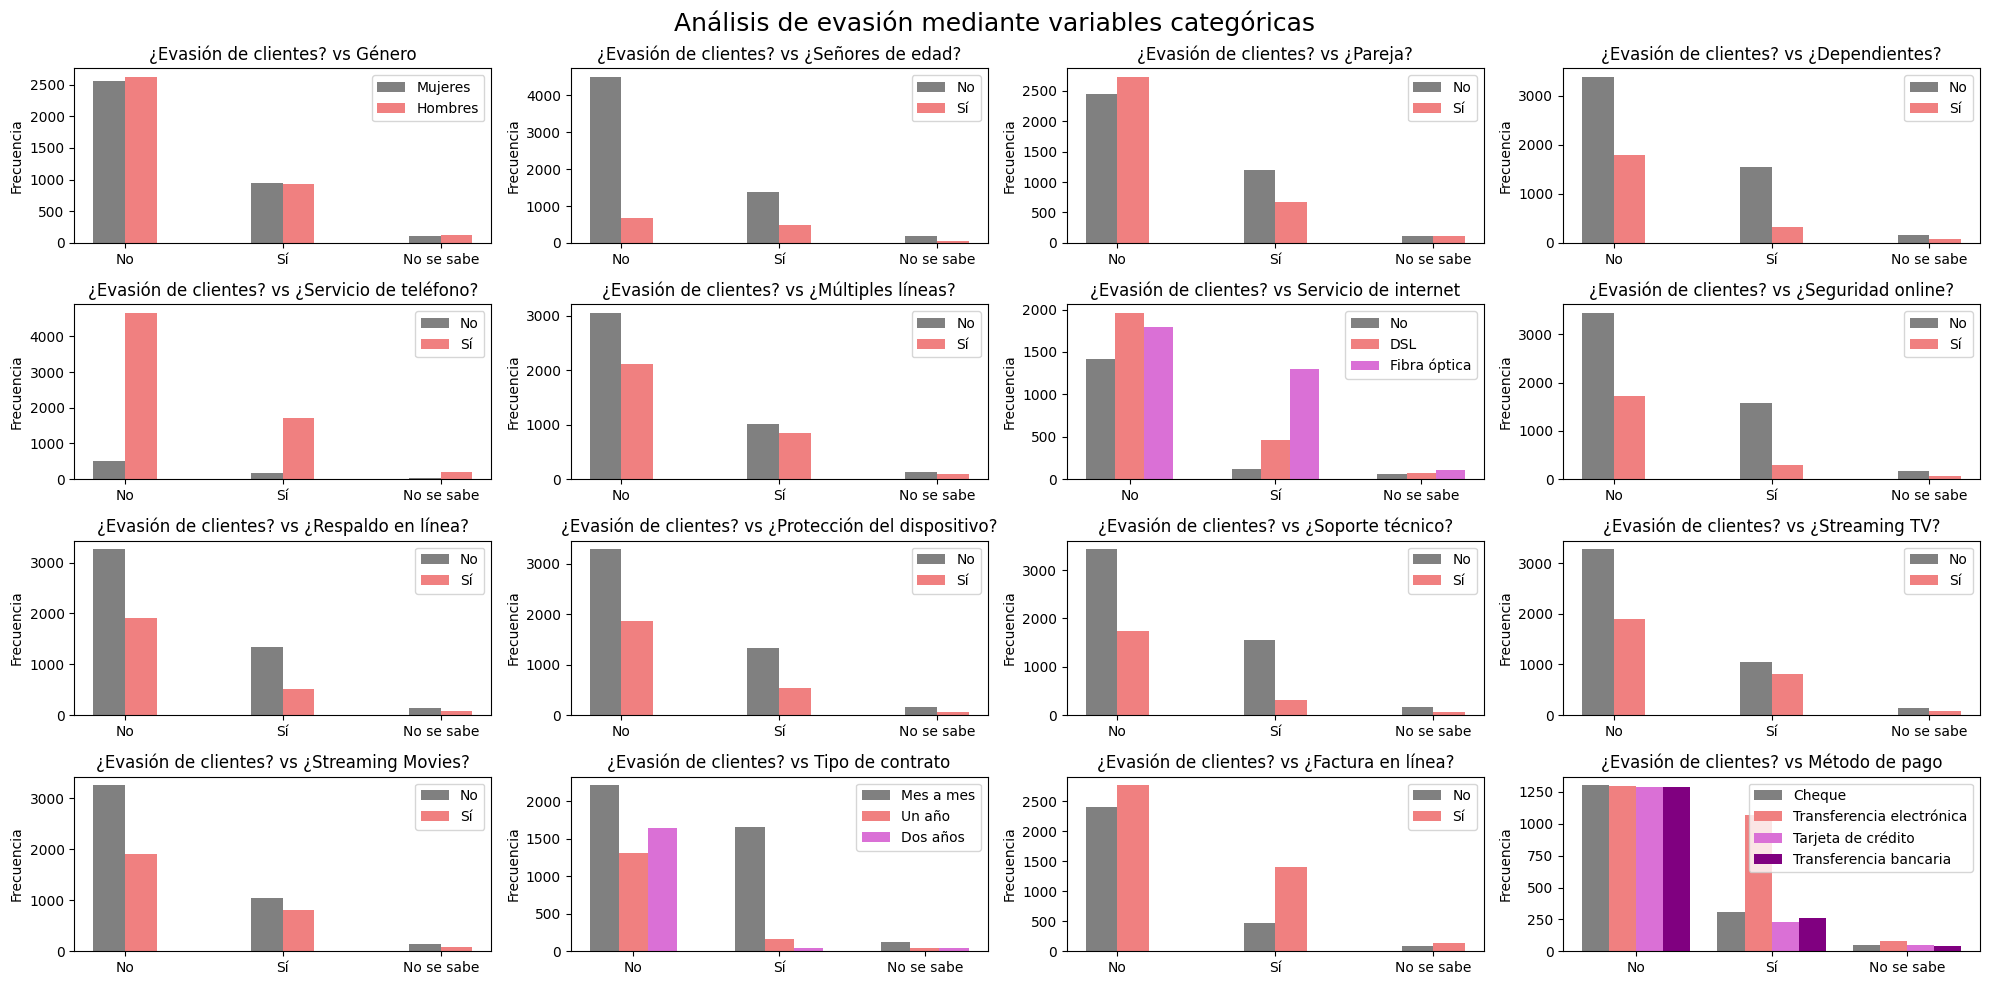

In [23]:
iter = list(categorias)
num_graficos = len(target)  # Número total de gráficos
filas, columnas = 4, 4

# Crear una figura con una cuadrícula de subgráficos
fig, axs = plt.subplots(filas, columnas, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3) #Ajuste de espaciado entre las figuras
fig.suptitle("Análisis de evasión mediante variables categóricas", fontsize=18)

# Aplanar la matriz de ejes para facilitar la iteración
axs = axs.flatten()

for i, col in enumerate(target):
    x = np.arange(len(label_churn))
    width = 0.2

    v_1 = [df_churn[col][0][0], df_churn[col][1][0], df_churn[col][2][0]]
    v_2 = [df_churn[col][0][1], df_churn[col][1][1], df_churn[col][2][1]]
    v_3 = [df_churn[col][0][2], df_churn[col][1][2], df_churn[col][2][2]]
    v_4 = [df_churn[col][0][3], df_churn[col][1][3], df_churn[col][2][3]]

    ax = axs[i]  # Seleccionar el eje correspondiente

    if df_churn[col][0][3] != 0:
        ax.bar(x - width*1.5, v_1, width, label=categorias[iter[i]][0], color='grey')
        ax.bar(x - width/2, v_2, width, label=categorias[iter[i]][1], color='lightcoral')
        ax.bar(x + width/2, v_3, width, label=categorias[iter[i]][2], color='orchid')
        ax.bar(x + width*1.5, v_4, width, label=categorias[iter[i]][3], color='purple')
    elif df_churn[col][0][2] != 0:
        ax.bar(x - width, v_1, width, label=categorias[iter[i]][0], color='grey')
        ax.bar(x, v_2, width, label=categorias[iter[i]][1], color='lightcoral')
        ax.bar(x + width, v_3, width, label=categorias[iter[i]][2], color='orchid')
    else:
        ax.bar(x - width/2, v_1, width, label=categorias[iter[i]][0], color='grey')
        ax.bar(x + width/2, v_2, width, label=categorias[iter[i]][1], color='lightcoral')

    ax.set_xticks(x)
    ax.set_xticklabels(label_churn)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'¿Evasión de clientes? vs {iter[i]}')
    ax.legend()

# Ajustar espacios entre gráficos para mejor visualización
plt.tight_layout()
plt.show()


In [24]:
dfn_churn = df_final[["Churn", "tenure", "Charges_Monthly", "Cuentas_Diarias","Charges_Total"]]
dfn_churn

,Churn,tenure,Charges_Monthly,Cuentas_Diarias,Charges_Total
0,0,9,65.60,2.186667,593.30
1,0,9,59.90,1.996667,542.40
2,1,4,73.90,2.463333,280.85
3,1,13,98.00,3.266667,1237.85
4,1,3,83.90,2.796667,267.40
...,...,...,...,...,...
7262,0,13,55.15,1.838333,742.90
7263,1,22,85.10,2.836667,1873.70
7264,0,2,50.30,1.676667,92.75
7265,0,67,67.85,2.261667,4627.65


In [25]:
list(dfn_churn[["Churn"]].value_counts())

[5174, 1869, 224]

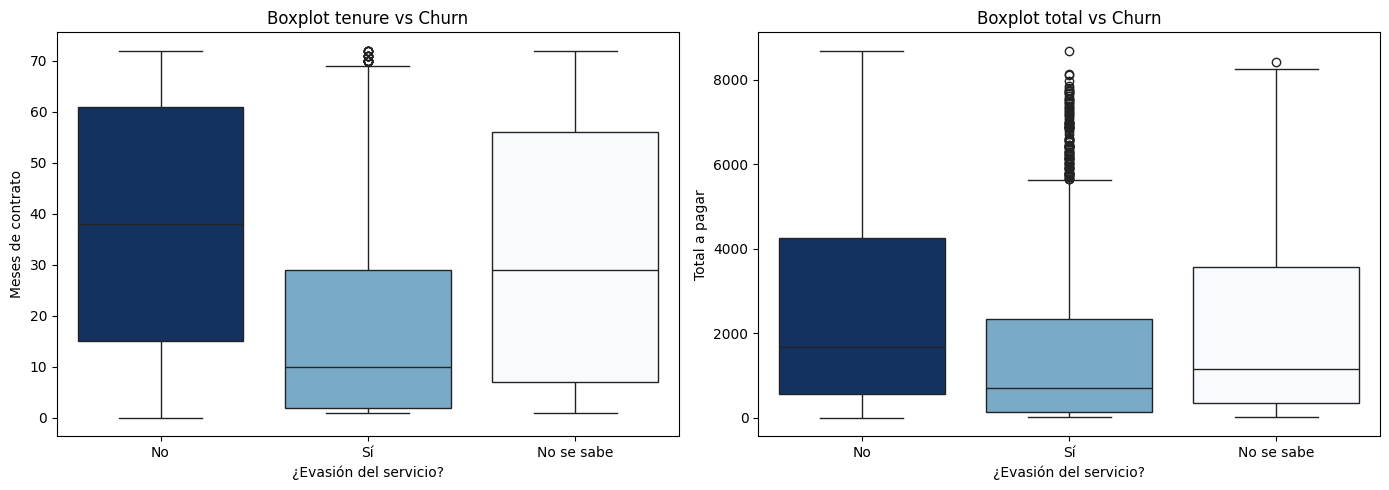

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))


sns.boxplot(x="Churn", y="tenure", data=dfn_churn,
            palette="Blues_r", hue="Churn", ax=ax[0], legend=False)

ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(["No", "Sí", "No se sabe"])
ax[0].set_title("Boxplot tenure vs Churn")
ax[0].set_xlabel("¿Evasión del servicio?")
ax[0].set_ylabel("Meses de contrato")


sns.boxplot(x="Churn", y="Charges_Total", data=dfn_churn,
            palette="Blues_r", hue="Churn", ax=ax[1], legend=False)

ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(["No", "Sí", "No se sabe"])
ax[1].set_title("Boxplot total vs Churn")
ax[1].set_xlabel("¿Evasión del servicio?")
ax[1].set_ylabel("Total a pagar")

plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()


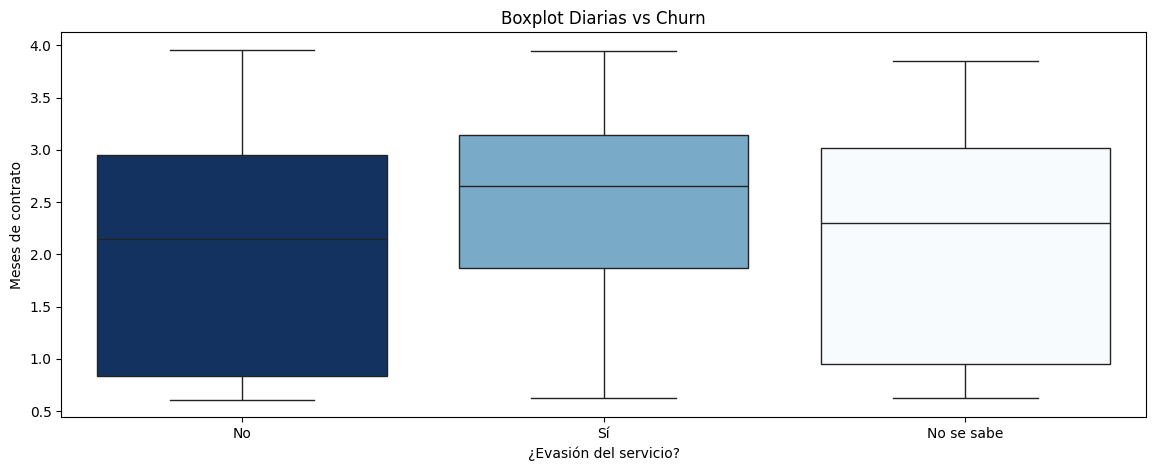

In [27]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.boxplot(x="Churn", y="Cuentas_Diarias", data=dfn_churn,
            palette="Blues_r", hue="Churn", legend=False)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(["No", "Sí", "No se sabe"])
ax.set_title("Boxplot Diarias vs Churn")
ax.set_xlabel("¿Evasión del servicio?")
ax.set_ylabel("Meses de contrato")

plt.show()

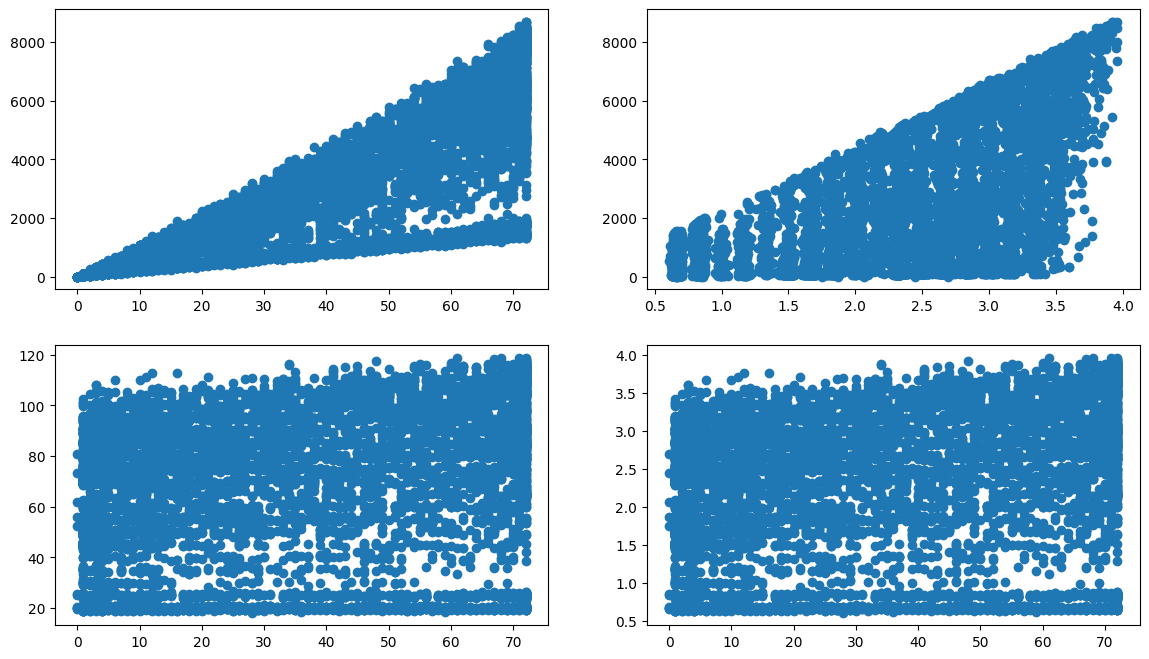

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8))

ax[0,0].scatter(dfn_churn['tenure'], dfn_churn['Charges_Total'])

ax[0,1].scatter(dfn_churn['Cuentas_Diarias'], dfn_churn['Charges_Total'])

ax[1,0].scatter(dfn_churn['tenure'], dfn_churn['Charges_Monthly'])

ax[1,1].scatter(dfn_churn['tenure'], dfn_churn['Cuentas_Diarias'])
plt.show()

**Correlaciones e inferencias**


---



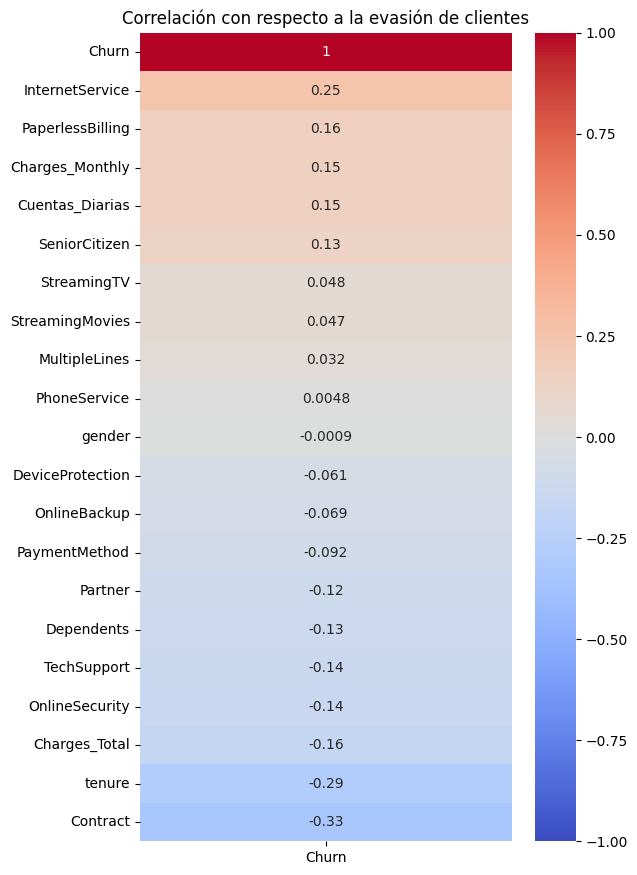

In [29]:
correlation = df_final.corr(numeric_only=True)[["Churn"]].sort_values("Churn", ascending=False)

# Graficar heatmap
plt.figure(figsize=(6, len(correlation) * 0.5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlación con respecto a la evasión de clientes")
plt.show()

In [30]:
# Filtrar los que tienen Churn == 1; los que se dieron de baja. Y los que no
df_evasion = df_final[df_final["Churn"] == 1]
df_noEvasion = df_final[df_final["Churn"] == 0]

# Calcular Q1, Q3 e IQR para la columna Charges_Total
Q1 = df_evasion["Charges_Total"].quantile(0.25)
Q3 = df_evasion["Charges_Total"].quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_outliers = df_evasion[(df_evasion["Charges_Total"] < lower_bound) |
                       (df_evasion["Charges_Total"] > upper_bound)]

df_outliers


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
113,0193-ESZXP,1,0,1,1,0,58,1,0,2,1,1,0,1,1,1,1,1,2,105.50,6205.50,3.516667
119,0201-OAMXR,1,0,0,0,0,70,1,1,2,1,1,1,1,1,1,1,0,2,115.55,8127.60,3.851667
199,0310-MVLET,1,0,0,1,1,61,1,1,2,0,1,0,0,1,1,0,1,1,99.15,6010.05,3.305000
214,0324-BRPCJ,1,0,1,1,0,68,1,1,2,0,1,0,0,1,1,0,1,1,100.20,6851.65,3.340000
232,0348-SDKOL,1,0,0,1,0,58,1,1,2,0,0,1,1,1,1,0,1,2,102.10,5885.40,3.403333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6908,9518-RWHZL,1,0,0,0,0,64,1,1,2,0,0,1,0,1,1,1,1,2,100.05,6254.20,3.335000
6948,9572-MTILT,1,1,0,1,0,59,1,1,2,1,1,1,1,1,0,0,1,1,106.75,6252.90,3.558333
6978,9614-RMGHA,1,1,0,1,0,65,1,1,2,0,1,0,0,1,0,0,1,3,91.85,5940.85,3.061667
7013,9651-GTSAQ,1,0,0,1,0,53,1,0,2,1,1,1,0,1,1,1,1,3,106.10,5769.75,3.536667


In [31]:
df_evasion.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,1.0,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,1.633494,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,0.140182,0.749064,1.235420,74.441332,1531.796094,2.481378
std,0.0,0.500128,0.435799,0.479524,0.379576,19.531123,0.287626,0.498085,0.594381,0.364687,0.449035,0.454621,0.372058,0.495959,0.496232,0.414714,0.433668,0.886617,24.666053,1890.822994,0.822202
min,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,0.628333
25%,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,56.150000,134.500000,1.871667
50%,1.0,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,79.650000,703.550000,2.655000
75%,1.0,1.000000,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,94.200000,2331.300000,3.140000
max,1.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.350000,8684.800000,3.945000


In [32]:
df_noEvasion.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,5174.0,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.0,0.507344,0.128721,0.528218,0.344801,37.569965,0.901044,0.409934,1.074604,0.333204,0.368380,0.362775,0.335137,0.365868,0.369927,0.889254,0.535562,1.494395,61.265124,2549.911442,2.042171
std,0.0,0.499994,0.334923,0.499251,0.475349,24.113777,0.298632,0.491869,0.784442,0.471405,0.482412,0.480847,0.472084,0.481719,0.482831,0.857478,0.498782,1.118647,31.092648,2329.954215,1.036422
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.0,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.100000,572.900000,0.836667
50%,0.0,1.000000,0.000000,1.000000,0.000000,38.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,64.425000,1679.525000,2.147500
75%,0.0,1.000000,0.000000,1.000000,1.000000,61.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,88.400000,4262.850000,2.946667
max,0.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8672.450000,3.958333


In [33]:
df_outliers.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,109.0,109.000000,109.000000,109.000000,109.000000,109.000000,109.0,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,1.0,0.568807,0.247706,0.697248,0.229358,63.880734,1.0,0.908257,1.990826,0.385321,0.724771,0.761468,0.431193,0.926606,0.899083,0.935780,0.798165,1.807339,104.147706,6670.281193,3.471590
std,0.0,0.497530,0.433674,0.461571,0.422362,5.483519,0.0,0.289996,0.095783,0.488919,0.448693,0.428155,0.497530,0.261987,0.302611,0.723613,0.403224,0.833078,6.574359,695.562975,0.219145
min,1.0,0.000000,0.000000,0.000000,0.000000,52.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,83.000000,5638.300000,2.766667
25%,1.0,0.000000,0.000000,0.000000,0.000000,59.000000,1.0,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,100.200000,6125.400000,3.340000
50%,1.0,1.000000,0.000000,1.000000,0.000000,65.000000,1.0,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,105.000000,6579.050000,3.500000
75%,1.0,1.000000,0.000000,1.000000,0.000000,68.000000,1.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,108.600000,7176.550000,3.620000
max,1.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.350000,8684.800000,3.945000


In [34]:
df_final.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.318839,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,1.222513,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.688730,0.593230,1.423971,64.720098,2277.182035,2.157337
std,0.528079,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.779873,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.833174,0.491265,1.067676,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.425000,396.200000,1.180833
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.875000,3778.525000,2.995833
max,2.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.958333


In [35]:
print(df_evasion['Contract'].value_counts())
print(df_evasion['PaymentMethod'].value_counts())

Contract
0    1655
1     166
2      48
Name: count, dtype: int64
PaymentMethod
1    1071
0     308
3     258
2     232
Name: count, dtype: int64


In [36]:
df_final[df_final['Charges_Total'] == df_final['Charges_Total'].min()]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
975,1371-DWPAZ,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,2,0,2,56.05,0.0,1.868333
1775,2520-SGTTA,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,20.00,0.0,0.666667
1955,2775-SEFEE,0,1,0,0,1,0,1,1,1,1,1,0,1,0,0,2,1,3,61.90,0.0,2.063333
2075,2923-ARZLG,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,19.70,0.0,0.656667
2232,3115-CZMZD,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,0,20.25,0.0,0.675000
2308,3213-VVOLG,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,0,25.35,0.0,0.845000
2930,4075-WKNIU,0,0,0,1,1,0,1,1,1,0,1,1,1,1,0,2,0,0,73.35,0.0,2.445000
3134,4367-NUYAO,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,0,25.75,0.0,0.858333
3203,4472-LVYGI,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0,2,1,3,52.55,0.0,1.751667
4169,5709-LVOEQ,0,0,0,1,1,0,1,0,1,1,1,1,0,1,1,2,0,0,80.85,0.0,2.695000


In [37]:
df_final[df_final['Charges_Monthly'] == df_final['Charges_Monthly'].min()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
4988,6823-SIDFQ,0,1,0,0,0,28,1,0,0,0,0,0,0,0,0,1,0,2,18.25,534.7,0.608333


# Informe final

**Análisis de Evasión de Clientes (Churn)**

1. *Introducción*

---



El presente análisis tiene como objetivo comprender los factores que influyen en la evasión de clientes (`Churn`) en una empresa de telecomunicaciones. El término Churn hace referencia a los clientes que cancelan su suscripción a los servicios de la empresa. La retención de clientes es un desafío clave en este sector debido a la alta competencia y al bajo costo de cambiar de proveedor.

---



2. *Limpieza y Tratamiento de Datos*

---



- Importación de datos:

Se cargó un archivo en formato `.json` desde un repositorio público de GitHub.

- Normalización de estructura:

El dataset tenía columnas anidadas, por lo que se utilizó `pd.json_normalize()` para convertir cada subnivel en columnas planas.

- Concatenación:

Se unificaron las columnas procesadas con `customerID` y `Churn` en un único DataFrame llamado `df_final`.

- Transformaciones adicionales:

Se identificaron y documentaron columnas con datos categóricos, booleanos y numéricos.

Se detectaron valores faltantes y se hizo una revisión de los tipos de datos.

Se eliminaron o reemplazaron valores como `" "` (vacíos) en la columna `Churn`.

---



3. *Análisis Exploratorio de Datos*

---



Se exploraron distintas variables para detectar patrones relevantes:

- Visualizaciones destacadas:

**Boxplots**: Comparación entre `tenure` y `Charges_Total` con respecto a si el cliente se dio de baja (`Churn`).

Clientes que se dan de baja suelen tener menor antigüedad (`tenure`) y menor `Charges_Total`.

- Distribución de contratos:

Mayor tasa de `Churn` en contratos mensuales.

- Servicios de internet:

La evasión es mayor en clientes con fibra óptica, y menor en los que cuentan con servicios de seguridad online o soporte técnico.

- Outliers:

Se analizaron los registros con valores atípicos en Charges_Total dentro del grupo de clientes que cancelaron el servicio.

- Segmentación

Se dividieron los datos en tres grupos para su análisis comparativo:

    df_noEvasion: clientes que permanecen activos.

    df_evasion: clientes que se dieron de baja.

    df_outliers: subgrupo de df_evasion con gastos totales inusualmente altos.

Se utilizaron gráficos de barras y boxplots para comparar visualmente las características entre estos tres grupos.





Inferencia de los datos
---

- El mínimo de charges_total es 0, sin embargo hay valor para el cargue de cada mes, por lo que se infiere que el cliente no está pagando pero se le está dando un servicio sin contrato.
- No obstante, el mínimo de cargo mensual sí tiene un precio en el total.

**Inferencia de evasión**

- No hay diferencia entre los géneros.
- La mayoría son jóvenes.
- La mayoría no tiene pareja.
- La mayoría no tiene dependientes.
- El promedio de meses son 18, sin embargo, el 50% de los datos muestra una tendencia a 10 meses, Q3 sigue con 29. Una nota importante es que el mayor mes se encuentra en este df_evasion (72 meses).
- Sobre el servicio de teléfono la mayoría tiene servicios de teléfonos.
- No hay diferencia entre las líneas múltiples.
- El 50% tiene fibra óptica, un 25% por lo menos, tiene DSL, y una minoría no tiene el servicio de internet.
- La mayoría de servicios de internet tienden a no ser comprados.
- La gran mayoría de contratos son mes-a-mes, y en pequeña proporción los de 1 año y 2 años.
- Estos clientes prefieren la factura electrónica.
- Los clientes tienden a pagar mediante el chequeo electrónico. Los demás métodos permanecen en una pequeña proporción
---



4. Conclusiones e Insights

---



- **Tiempo de permanencia**: los clientes que cancelan tienden a tener poca antigüedad en el servicio.

- **Facturación mensual**: existe una correlación entre facturación baja y tasa de cancelación.

- **Tipo de contrato**: los contratos mensuales tienen mayor riesgo de Churn; los contratos anuales retienen más clientes.

- **Servicios adicionales**: clientes con más servicios contratados (soporte técnico, seguridad, etc.) son menos propensos a irse.

- **Outliers**: algunos clientes con gastos muy altos también cancelan, lo cual puede deberse a problemas de facturación o insatisfacción severa.

---



5. Recomendaciones

---



Fomentar contratos a largo plazo con beneficios exclusivos para disminuir la tasa de cancelación.

Mejorar la experiencia en los primeros meses, ya que muchos clientes se dan de baja en este periodo.

Ofrecer paquetes con valor agregado: incluir soporte técnico o seguridad online puede aumentar la retención.

Monitorear outliers de facturación para detectar posibles errores o malas experiencias que lleven a la cancelación.

Segmentar clientes en riesgo usando modelos predictivos para actuar preventivamente.